<a href="https://colab.research.google.com/github/MIARD/Image_Processing_CSE428/blob/main/CSE428_Fall21_LAB1_18301224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "Minhajul Abedin"
ID = "18301224"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [ ]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

Height is 955
Width is 955


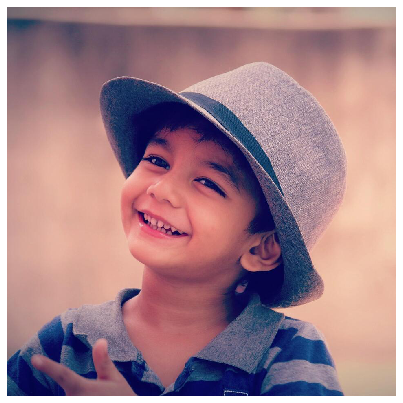

In [ ]:
I = io.imread('sample.jpeg') # Replace None with appropriate function call line


# find the height and the width of the image
H = I.shape[0] # should contain height
W = I.shape[1] # should contain width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION
# Make sure image less then 1000 x 1000 pixel
if H > 1000 or W > 10000:
  H_p = 1
  W_p = 1
  if H > 1000:
    H_r = int(np.ceil(H / 1000))
  if W > 1000:
    W_r = int(np.ceil(W / 1000))
  I = I[::H_r, ::W_r, :]
  print("New Height is", I.shape[0])
  print("New Width is", I.shape[1])

plt.rcParams['figure.figsize'] = (6,6)
io.imshow(I)
plt.axis('off')
plt.show()
### END SOLUTION

In [ ]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
plt.rcParams['figure.figsize'] = (5,5)
I = I / 255
# print(np.unique(I).min())
# print(np.unique(I).max())
### BEGIN SOLUTION
io.imshow(I)
plt.axis('off')
plt.show()
### END SOLUTION

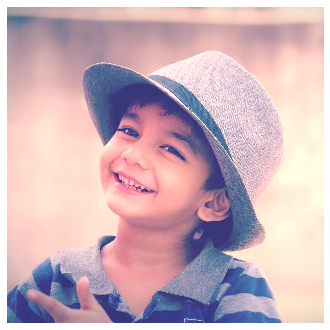

In [ ]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
I_bright = np.clip(I + 0.2, 0, 1)
# print(np.unique(I).max())
### BEGIN SOLUTION
io.imshow(I_bright)
plt.axis('off')
plt.show()
### END SOLUTION

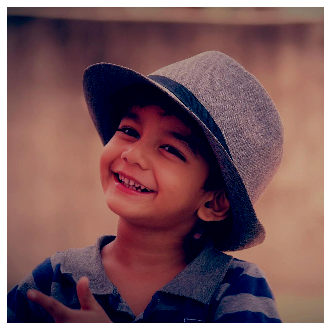

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.
I_dark = np.clip(I - 0.2, 0, 1)
# print(np.unique(I).min())
### BEGIN SOLUTION
io.imshow(I_dark)
plt.axis('off')
plt.show()
### END SOLUTION

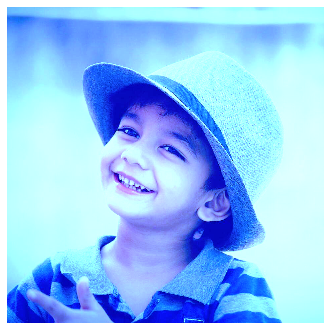

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint[:,:,0] = np.clip(I[:,:,0] * 0.9, 0, 1)
I_tint[:,:,1] = np.clip(I[:,:,1] * 1.8, 0, 1)
I_tint[:,:,2] = np.clip(I[:,:,2] * 2.7, 0, 1)

io.imshow(I_tint)
plt.axis('off')
plt.show()
### END SOLUTION

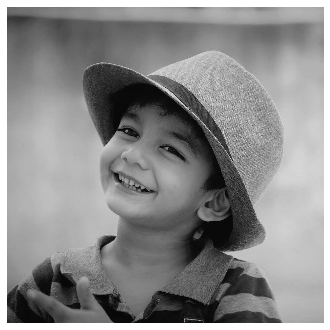

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)

### BEGIN SOLUTION
io.imshow(I_gray)
plt.axis('off')
plt.show()
# plt.hist(I_gray.ravel(), bins = 256, histtype='step', color = 'black')
### END SOLUTION

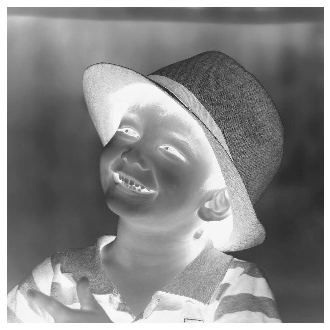

In [ ]:
# Display the negative of the grayscale image
I_gray_neg = 1 - I_gray
### BEGIN SOLUTION
io.imshow(I_gray_neg)
plt.axis('off')
plt.show()
### END SOLUTION

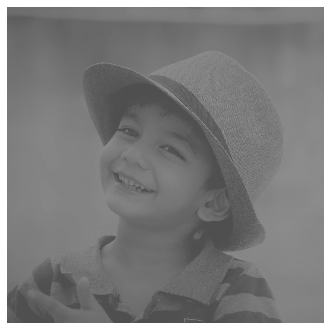

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = exposure.rescale_intensity(I_gray, in_range=(0,1), out_range=(0.3,0.6))

### BEGIN SOLUTION
io.imshow(I_degraded)
plt.axis('off')
plt.show()
# plt.hist(I_degraded.ravel(), bins = 256, histtype='step', color = 'black')
### END SOLUTION

In [ ]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I_gray, r1, r2, s1, s2):
    # Write your code here
    I_stretched = I_gray.copy() # replace with appropriate code
    for h in range(I.shape[0]):
      for w in range(I.shape[1]):
        value = I_stretched[h, w]
        if value > 0 and value <= r1:
          I_stretched[h, w] = (s1/r1) * value;
        elif  value > r1 and value <= r2:
          I_stretched[h, w] = s1 + ((s2 - s1)/(r2 - r1)) * (value- r1) ;
        else:
          I_stretched[h, w] = s2 + ((1 - s2)/(1 - r2)) * (value - r2);
    I_stretched = np.clip(I_stretched, 0, 1)
    return I_stretched
    ### BEGIN SOLUTION

    ### END SOLUTION



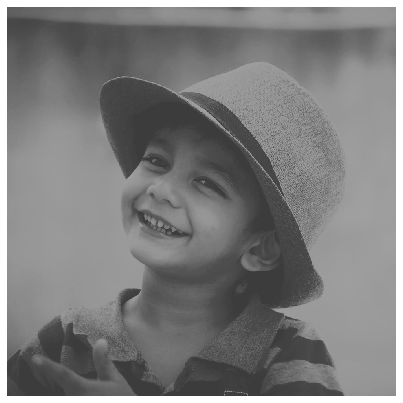

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.4
r2 = 0.5
s1 = 0.303
s2 = 0.582
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

plt.figure(figsize=(6,6))
io.imshow(I_stretched)
plt.axis('off')
plt.show()

# print(I_gray.min(), " ", str(I_gray.max()))
# print(I_degraded.min()," ",str(I_degraded.max()))
# print(I_stretched.min()," ",str(I_stretched.max()))
# Display the strtched image

# plt.hist(I_stretched.ravel(), bins = 256, histtype='step', color = 'black')
# plt.hist(I_degraded.ravel(), bins = 256, histtype='step', color = 'red')
# plt.hist(I_gray.ravel(), bins = 256, histtype='step', color = 'blue')
# plt.xlim(0,1)

#### BEGIN SOLUTION
### END SOLUTION

# Task 2 - Histogram and Equalization

In [ ]:
def plot_hist(I, nbins = 256, normalize = False, plot_cdf=True, ):
  hist, bins_hist = exposure.histogram(I.ravel(), nbins = nbins, normalize=normalize)
  ax1 = plt.plot(bins_hist, hist, 'k', label='Histogram')
  plt.xlabel('Pixel values')
  axis = ax1
  xmax = 1 if I.max() <= 1 else 255
  plt.xlim([0,xmax])
  if normalize:
    plt.ylabel('Probability')
  else:
    plt.ylabel('Count')
  if plot_cdf:
    cdf, bins_cdf = exposure.cumulative_distribution(I, nbins = nbins)
    plt.twinx()
    ax2 = plt.plot(bins_cdf, cdf, 'r', lw=3, label='CDF')
    plt.ylabel('Percentage')
    axis += ax2

  label = [l.get_label() for l in axis]
  plt.legend(axis, label, loc=0)

def plot_img_hist(I, nbins = 256, normalize = False, plot_cdf=True, ititle="Image", htitle="Histogram and CDF",clr = False, w_cdf= False):
  plt.subplot(2, 1, 1)
  io.imshow(I)
  plt.axis('off')
  plt.title(ititle)

  if clr:
    I_gray = color.rgb2lab(I)[:,:,0]/100
    plt.subplot(2, 2, 3)
  else:
      I_gray = I
      plt.subplot(2, 1, 2)
  plot_hist(I_gray, nbins = nbins, normalize=normalize, plot_cdf=plot_cdf)
  plt.title(htitle)

  if clr:
    plt.subplot(2, 2, 4)
    plot_hist_cdf_color(I, nbins = nbins, normalize=normalize, plot_cdf=False, w_cdf=w_cdf)
    plt.title("RGB Histogram")

def plot_hist_cdf_color(I, nbins = 256, normalize = True, plot_cdf=False, w_cdf = False):
  colors  = ['red', 'green', 'blue']
  xmax = 1 if I.max() <= 1 else 255
  plt.xlim([0,xmax])
  for i in range(3):
    if plot_cdf:
      cdf, bins_cdf = exposure.cumulative_distribution(I[:,:,i].ravel(), nbins = 256)
      plt.plot(bins_cdf, cdf, lw = 2,color = colors[i])
    else:
      hist, bins_hist = exposure.histogram(I[:,:,i].ravel(), nbins = nbins, normalize=normalize)
      plt.plot(bins_hist, hist, colors[i])
      if w_cdf:
        plt.twinx()
        cdf, bins_cdf = exposure.cumulative_distribution(I[:,:,i].ravel(), nbins = 256)
        plt.plot(bins_cdf, cdf, lw = 2,color = "dark"+colors[i])
  plt.xlabel('Pixel values')
  xmax = 1 if I.max() <= 1 else 255
  plt.xlim([0,xmax])
  if normalize:
    plt.ylabel('Probability')
  else:
    plt.ylabel('Count')
  plt.legend(['Red channel','Green channel', 'Blue channel'])

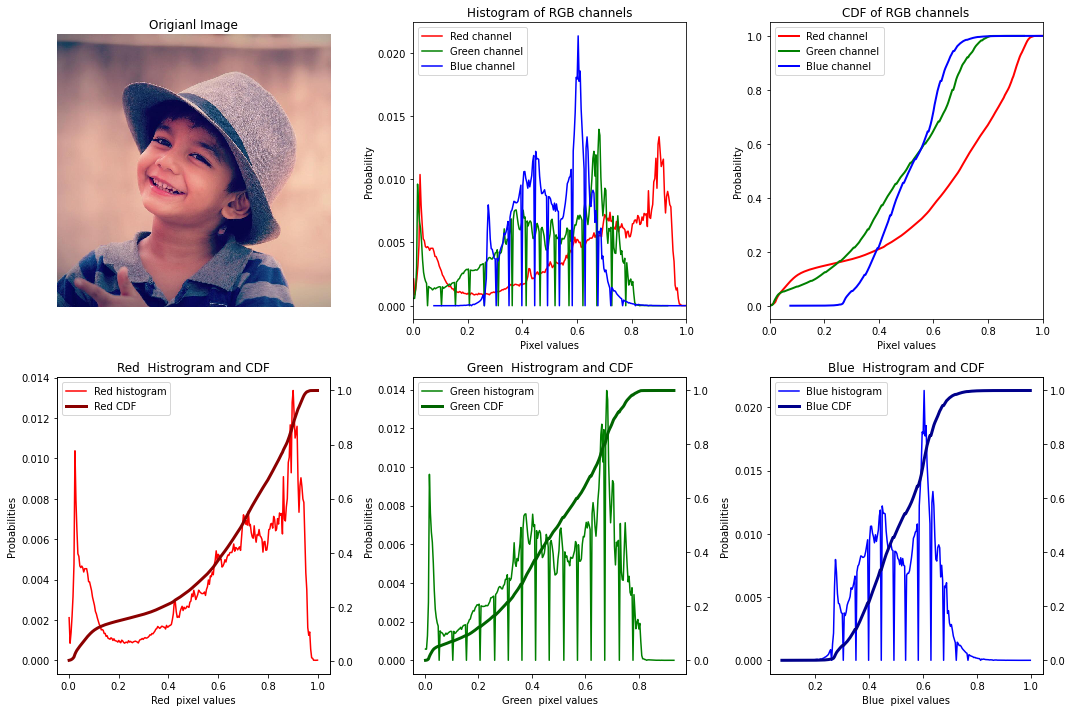

In [ ]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(2,3,1)
io.imshow(I)
plt.title("Origianl Image")
plt.axis('off')
### BEGIN SOLUTION
plt.subplot(2,3,2)
plot_hist_cdf_color(I)
plt.title('Histogram of RGB channels')
plt.subplot(2,3,3)
plot_hist_cdf_color(I, plot_cdf=True)
plt.title('CDF of RGB channels')
colors = ['red', 'green', 'blue']
for i in range(3):
  cur_col = str(colors[i]).capitalize()+" "
  plt.subplot(2,3, 4+i)
  hist, bins_hist = exposure.histogram(I[:,:,i].ravel(), nbins = 256, normalize = True )
  ax1 = plt.plot(bins_hist, hist, color=colors[i], label = cur_col + 'histogram')
  plt.xlabel(cur_col +' pixel values')
  plt.ylabel('Probabilities')

  plt.twinx()
  cdf, bins_cdf = exposure.cumulative_distribution(I[:,:,i].ravel(), nbins = 256)
  ax2 = plt.plot(bins_cdf, cdf, lw = 3,color = 'dark'+colors[i],  label = cur_col + 'CDF')

  axis = ax1 + ax2
  labels = [l.get_label() for l in axis]
  plt.legend(axis, labels)
  plt.title(cur_col+" Histrogram and CDF")
plt.tight_layout()
plt.show()
### END SOLUTION

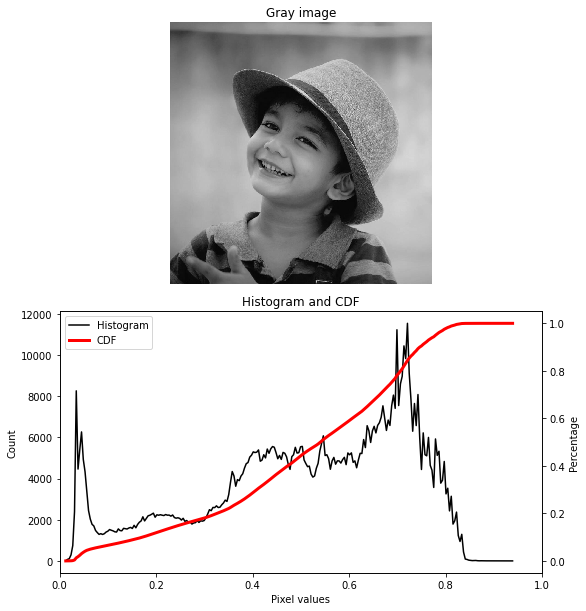

In [ ]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray
plt.rcParams['figure.figsize'] = (7, 8)
### BEGIN SOLUTION
plot_img_hist(I_gray, ititle="Gray image")
### END SOLUTION

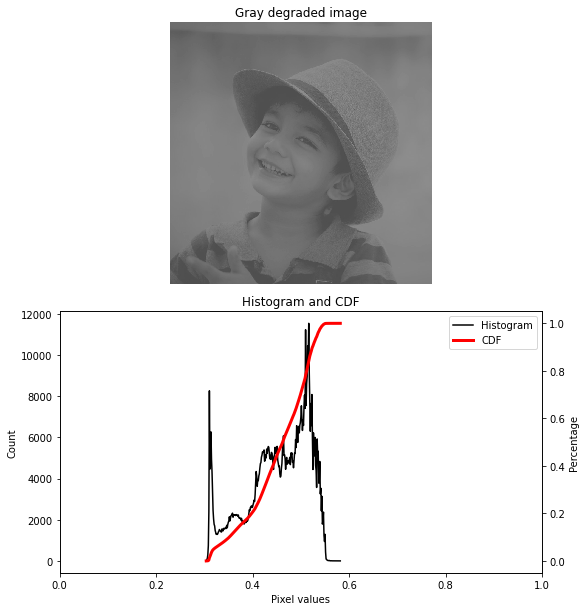

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plot_img_hist(I_degraded, ititle="Gray degraded image")
### END SOLUTION

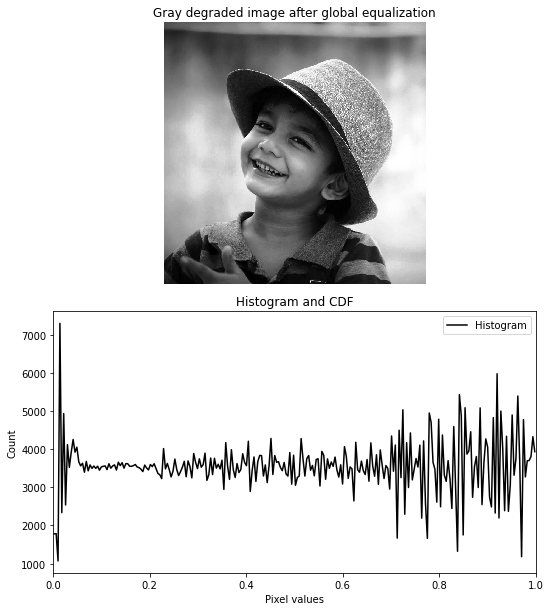

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded, nbins = 256)

### BEGIN SOLUTION
plot_img_hist(I_recon_gray, ititle="Gray degraded image after global equalization", plot_cdf=False)
### END SOLUTION

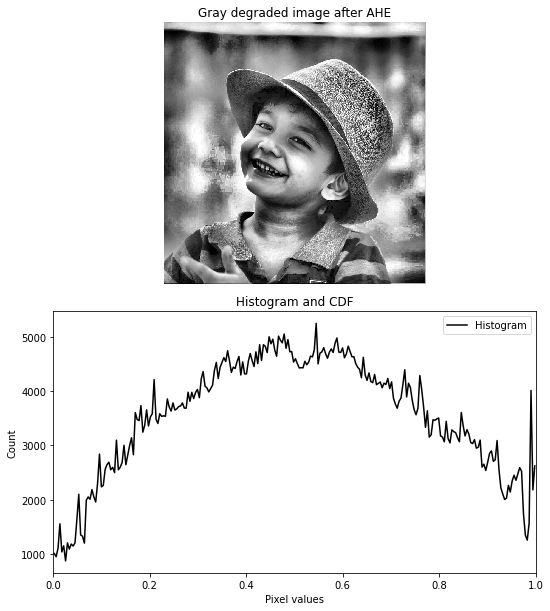

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(150, 150) , clip_limit=0)

### BEGIN SOLUTION
plot_img_hist(I_recon_gray_2, ititle="Gray degraded image after AHE", plot_cdf=False)
### END SOLUTION

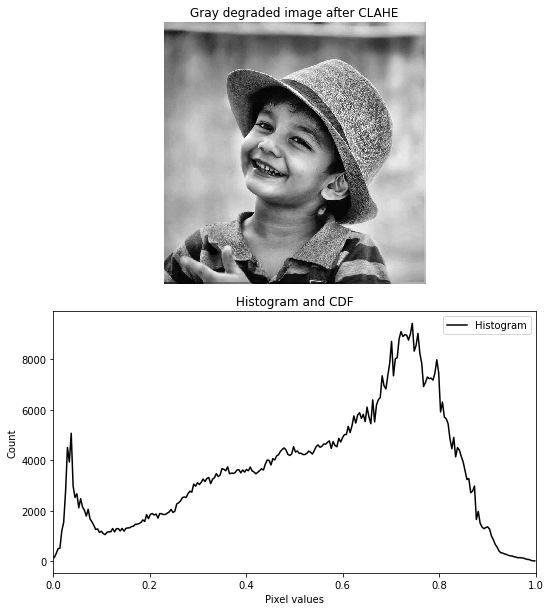

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(90, 90) , clip_limit=0.01)

### BEGIN SOLUTION
plot_img_hist(I_recon_gray_3, ititle="Gray degraded image after CLAHE", plot_cdf=False)

### END SOLUTION

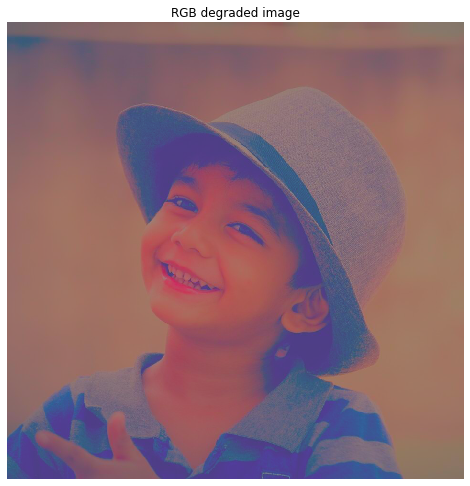

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes

I_rgb_degraded = color.rgb2lab(I)
I_rgb_degraded[:,:,0] = exposure.rescale_intensity(I_rgb_degraded[:,:,0] / 100, in_range=(0,1), out_range=(0.3,0.6)) * 100

I_rgb_degraded = color.lab2rgb(I_rgb_degraded)

### BEGIN SOLUTION
io.imshow(I_rgb_degraded)
plt.axis('off')
plt.title("RGB degraded image")
plt.show()
### END SOLUTION

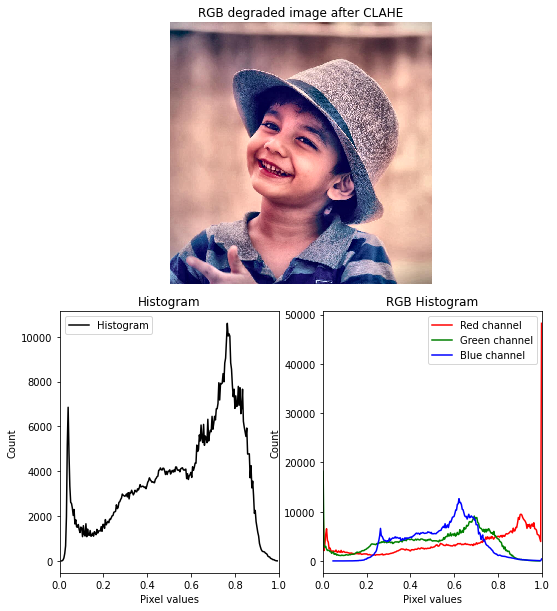

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes
plt.rcParams['figure.figsize'] = (7, 8)
I_recon_color = color.rgb2lab(I_rgb_degraded)
I_recon_color[:,:,0] = exposure.equalize_adapthist(I_recon_color[:,:,0] / 100.0, kernel_size=(110,110), clip_limit=0.01) * 100

I_recon_color = color.lab2rgb(I_recon_color)
### BEGIN SOLUTION
plot_img_hist(I_recon_color, ititle="RGB degraded image after CLAHE", htitle="Histogram",clr=True, plot_cdf=False)
### END SOLUTION

# Task 3 - Open Ended

In [ ]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION
def stretch(I_C, c_no=0,to_lab = False, I_min_max= (None, None), O_min_max = (0, 1),  log = False, gamma = False, c = 1, g = 0.8 ,clr = False, figsize = (8,8), w_cdf = False):
  plt.figure(figsize=figsize)
  I_C_stretched = I_C.copy()

  if to_lab and len(I_C.shape) == 3:
    I_C_lab = color.lab2rgb(I_C_stretched)
    I_C_stretched = I_C_lab[:,:,0] / 100
  if log:
    I_C_stretched = c * np.log(1 + I_C_stretched)
  elif gamma:
    I_C_stretched = c*(I_C_stretched ** g)
  else:
    I_min = I_C.min() if I_min_max[0] is None else I_min_max[0]
    I_max = I_C.max() if I_min_max[1] is None else I_min_max[1]
    O_min = O_min_max[0]
    O_max = O_min_max[1]
    m = (O_max-O_min)/(I_max-I_min)
    I_C_stretched = O_min + m*(I_C_stretched - I_min)
  c_max = 1 if I_C.max() <=1 else 255
  I_C_stretched = np.clip(I_C_stretched, 0, c_max)

  if to_lab and len(I_C.shape) == 3:
    I_C_lab[:,:,0] = I_C_stretched * 100
    I_C_stretched  = color.lab2rgb(I_C_lab)

  plot_img_hist(I_C_stretched, ititle=f"Challenge-{c_no} image after contrast stretching", plot_cdf=True, clr = clr, w_cdf= w_cdf)
  plt.tight_layout()
  return I_C_stretched

def GE(I_C, c_no=0, to_lab = False, clr = False, figsize = (8,8), w_cdf = False):
  plt.figure(figsize=figsize)
  I_C_GE = I_C.copy()
  if to_lab and len(I_C.shape) == 3:
    I_C_GE = color.rgb2lab(I_C_GE)
    I_C_GE[:,:,0] = exposure.equalize_hist(I_C_GE[:,:,0] / 100.0, nbins=256) * 100
    I_C_GE = color.lab2rgb(I_C_GE)
  else:
    if len(I_C.shape) == 3:
      for i in range(3):
        I_C_GE[:,:,i] = exposure.equalize_hist(I_C_GE[:,:,i], nbins=256)
    else:
      I_C_GE = exposure.equalize_hist(I_C_GE, nbins=256)

  plot_img_hist(I_C_GE , ititle=f"Challenge-{c_no} image after gloabl histogram equalizaiton", plot_cdf=True, clr = clr, w_cdf= w_cdf)
  plt.tight_layout()
  return I_C_GE

def AHE_CLAHE(I_C, c_no=0, kernel_size = (100, 100), clip_limit=0, to_lab=False, clr = False, figsize = (8,8), w_cdf = False):
  plt.figure(figsize=figsize)
  I_C_AHE = I_C.copy()
  if to_lab and len(I_C.shape) == 3:
    I_C_AHE = color.rgb2lab(I_C_AHE)
    I_C_AHE[:,:,0] = exposure.equalize_adapthist(I_C_AHE[:,:,0]/ 100.0, kernel_size=kernel_size, clip_limit = clip_limit) * 100
    I_C_AHE = color.lab2rgb(I_C_AHE)
  else:
    if len(I_C.shape) == 3:
      for i in range(3):
        I_C_AHE[:,:,i] = exposure.equalize_adapthist(I_C_AHE[:,:,i], kernel_size = kernel_size ,clip_limit=clip_limit)
    else:
      I_C_AHE = exposure.equalize_adapthist(I_C_AHE, kernel_size = kernel_size ,clip_limit=clip_limit)

  method = 'AHE' if clip_limit == 0 else 'CLAHE'
  plot_img_hist(I_C_AHE , ititle=f"Challenge-{c_no} image after "+ method, plot_cdf=True, clr = clr, w_cdf = w_cdf)
  plt.tight_layout()
  return I_C_AHE
def plot_solutions(I, titles = ['Origianl','Stretching', 'GE', 'AHE', 'CLAHE']):
  length = len(I)
  for i in range(length):
    plt.subplot(1, length, i+1)
    io.imshow(I[i])
    plt.title(titles[i])
    plt.axis('off')

## Challenge-1

In [ ]:
I_C1 = io.imread('challenge-1.jpg') / 255
print(I_C1.shape)
print("Min: ", str(I_C1.min()))
print("Max: ", str(I_C1.max()))
print(1/I_C1.max())

(850, 1118, 3)
Min:  0.0
Max:  0.07450980392156863
13.421052631578947


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


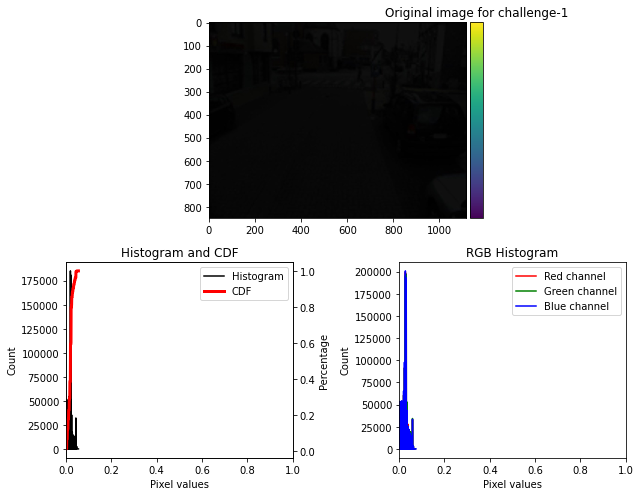

In [ ]:
  plt.rcParams['figure.figsize'] = (9,7)
  plot_img_hist(I_C1, ititle="Original image for challenge-1", plot_cdf=True, clr=True)
  plt.tight_layout()
  plt.show()

### Contrast Stretching


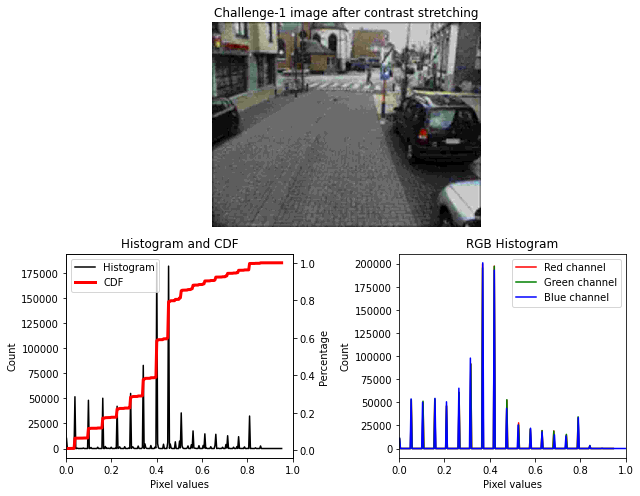

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
c_l = 20
c_g = 4
g = 0.8
I_C1_stretched= stretch(I_C1,c_no=1, clr =True, figsize=(9,7))
# I_C1_stretched= stretch(I_C1,1, log=True, c=c_l, clr =True, figsize=(9,7))
# I_C1_stretched= stretch(I_C1,1, gamma=True, c= c_g, g= g, clr =True, figsize=(9,7))

# plt.tight_layout()
plt.show()

### Histogram Equilization

#### Global Equilization

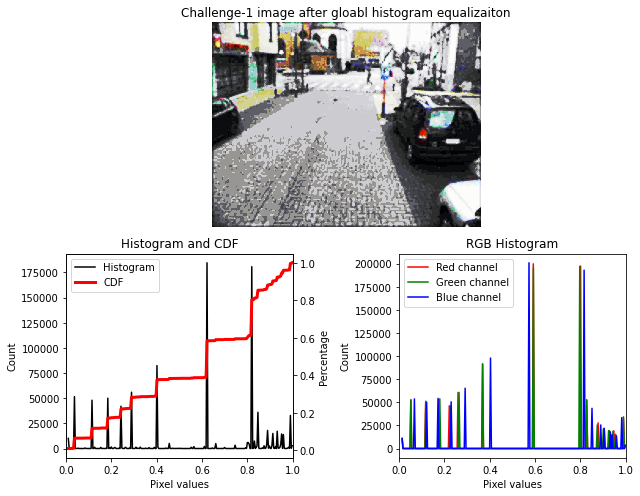

In [ ]:
I_C1_GE = GE(I_C1, 1, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### AHE

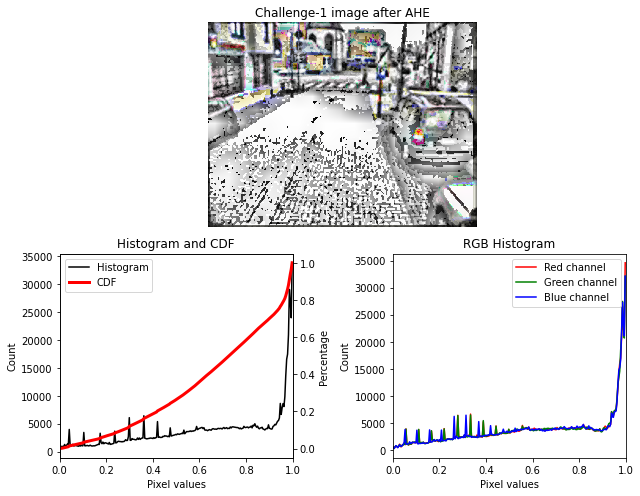

In [ ]:
I_C1_AHE = AHE_CLAHE(I_C1, 1, kernel_size = (60, 60), clip_limit=0, to_lab=False, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### CLAHE

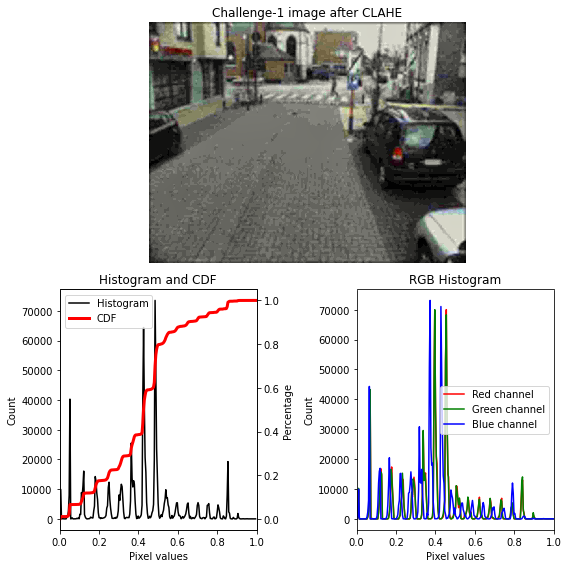

In [ ]:
I_C1_CLAHE = AHE_CLAHE(I_C1, 1, kernel_size = (100, 100), clip_limit=0.01, clr = True, figsize = (8,8), w_cdf = False)
plt.show()

### Final results

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


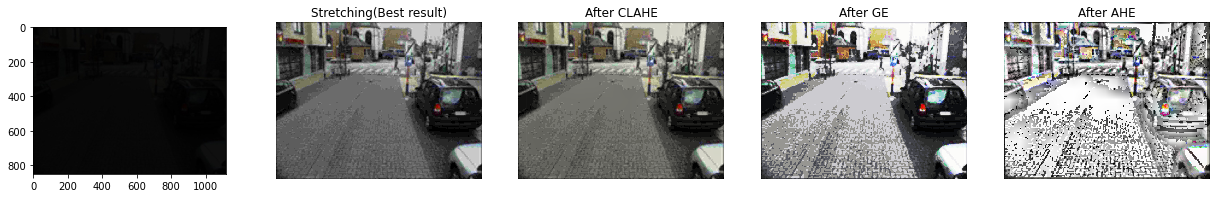

In [ ]:
I_C1_Sol = [I_C1, I_C1_stretched, I_C1_CLAHE,  I_C1_GE, I_C1_AHE ]
titles = ['Origianl image','Stretching(Best result)', 'After CLAHE',  'After GE', 'After AHE']
plt.rcParams['figure.figsize'] = (17,8)
plot_solutions(I_C1_Sol, titles)
# plt.tight_layout()
plt.axis('off')
plt.show()

## Challenge-2

In [ ]:
I_C2 = io.imread('challenge-2.jpg') / 255
print(I_C2.shape)
print("Min: ", str(I_C2.min()))
print("Max: ", str(I_C2.max()))

(850, 1125, 3)
Min:  0.41568627450980394
Max:  0.8666666666666667


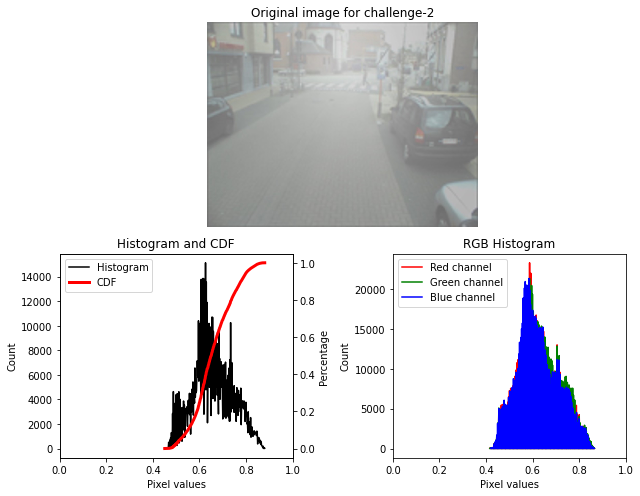

In [ ]:
  plt.rcParams['figure.figsize'] = (9,7)
  plot_img_hist(I_C2, ititle="Original image for challenge-2", plot_cdf=True, clr=True)
  plt.tight_layout()
  plt.show()

### Contrast Stretching


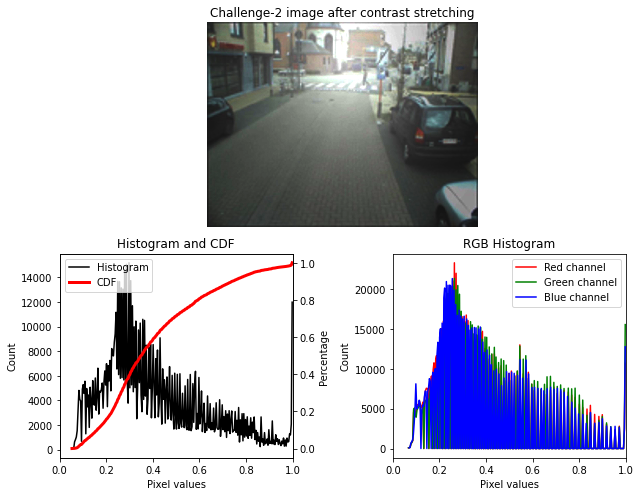

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
c_l = 1
c_g = 2.2
g = 4
# I_C2_stretched= stretch(I_C2,2, clr =True, figsize=(9,7))
# I_C2_stretched= stretch(I_C2,2, log=True, c=c_l, clr =True, figsize=(9,7))
I_C2_stretched= stretch(I_C2,2, gamma=True, c=c_g, g = g, clr =True, figsize=(9,7))

# plt.tight_layout()
plt.show()

### Histogram Equilization

#### Global Equilization

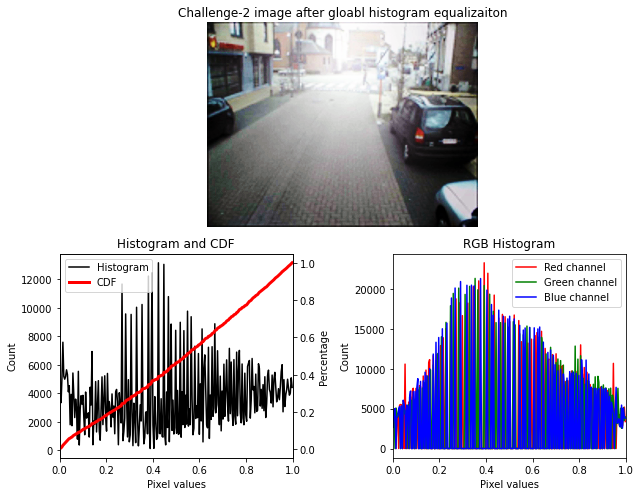

In [ ]:
I_C2_GE = GE(I_C2, 2, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### AHE

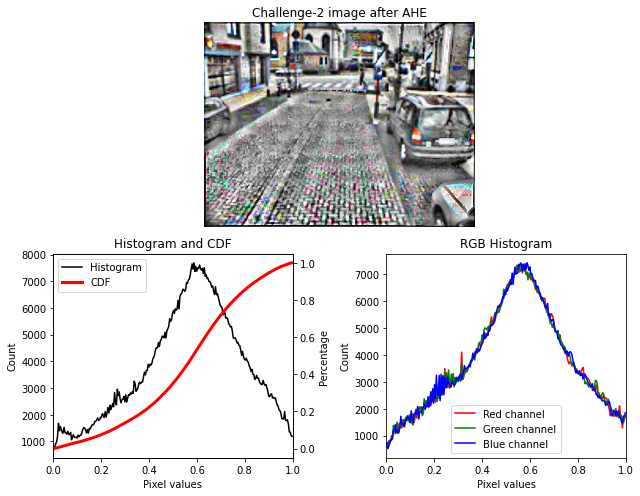

In [ ]:
I_C2_AHE = AHE_CLAHE(I_C2, 2, kernel_size = (70, 70), clip_limit=0, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### CLAHE

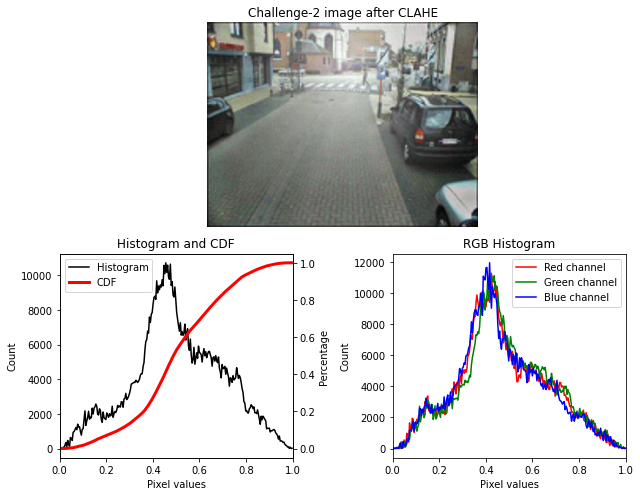

In [ ]:
I_C2_CLAHE = AHE_CLAHE(I_C2, 2, kernel_size = (80, 80), clip_limit=0.01,clr = True, figsize = (9,7), w_cdf = False)
plt.show()



### Final results

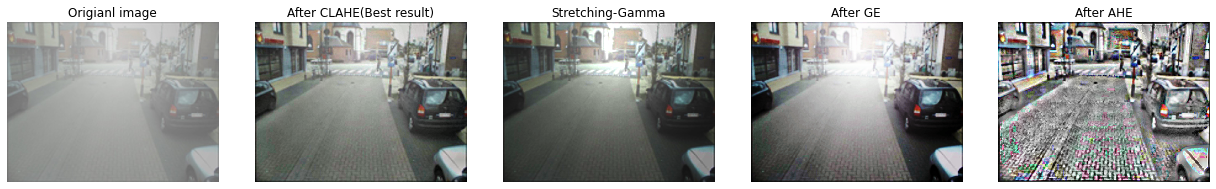

In [ ]:
I_C2_Sol = [I_C2, I_C2_CLAHE, I_C2_stretched,  I_C2_GE, I_C2_AHE ]
titles = ['Origianl image', 'After CLAHE(Best result)','Stretching-Gamma',  'After GE', 'After AHE']
plt.rcParams['figure.figsize'] = (17,8)
plot_solutions(I_C2_Sol, titles)
# plt.tight_layout()
plt.axis('off')
plt.show()

## Challenge-3

In [ ]:
I_C3 = io.imread('challenge-3.jpg') / 255
print(I_C3.shape)
print("Min: ", str(I_C3.min()))
print("Max: ", str(I_C3.max()))

(850, 1116, 3)
Min:  0.0
Max:  1.0


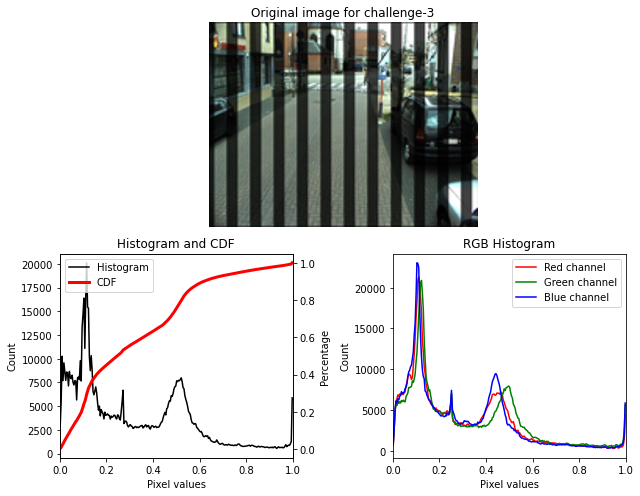

In [ ]:
  plt.rcParams['figure.figsize'] = (9,7)
  plot_img_hist(I_C3, ititle="Original image for challenge-3", plot_cdf=True, clr=True)
  plt.tight_layout()
  plt.show()

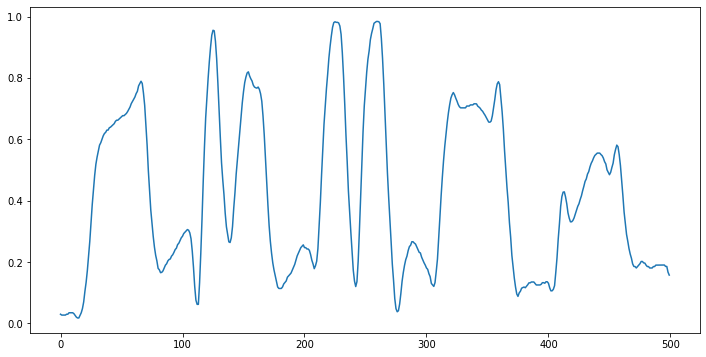

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
I_C3_LAB = color.rgb2lab(I_C3)
I_C3_gray = I_C3_LAB[:,:,0] / 100

plt.plot( I_C3_gray[10,:500])

# colors = ['Red', 'Green', 'Blue']
# for i in range(3):
#   plt.subplot(1, 3, i+1)
#   plt.plot(I_C3[20, :, i], color = colors[i])

Text(0.5, 1.0, 'Reconstruct')

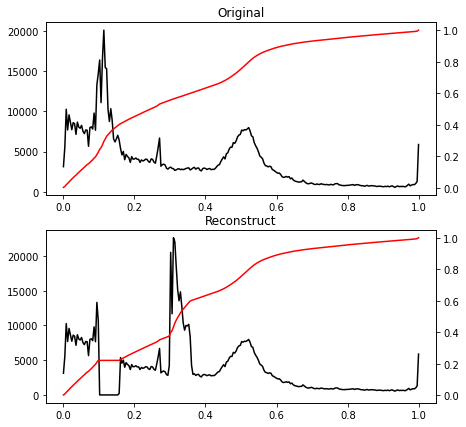

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)

I_C3_LAB = color.rgb2lab(I_C3)
I_C3_gray = I_C3_LAB[:,:,0] / 100
I_C3_O = I_C3_gray.copy()

l = 0.1
h = 0.16
I_C3_gray[(I_C3_gray >= l) & (I_C3_gray <= h)] =  np.clip(I_C3_gray[(I_C3_gray >= l) & (I_C3_gray <= h)] + 0.2, 0, 1)

I_C3_LAB[:,:,0 ]= I_C3_gray * 100
# I_C3_1 = I_C
I_C3_rgb = color.lab2rgb(I_C3_LAB)

# plt.subplot(2,1,1)
# io.imshow(I_C3_rgb)

plt.subplot(2,1,1)
hist, bins_hist = exposure.histogram(I_C3_O.ravel(), nbins = 256)

plt.plot(bins_hist, hist, color = 'black')
plt.twinx()
cdf, bins_cdf = exposure.cumulative_distribution(I_C3_O.ravel(), nbins = 256)
plt.plot(bins_cdf, cdf, color='red')
plt.title("Original")

plt.subplot(2,1,2)
hist, bins_hist = exposure.histogram(I_C3_gray.ravel(), nbins = 256)

plt.plot(bins_hist, hist, color = 'black')
plt.twinx()
cdf, bins_cdf = exposure.cumulative_distribution(I_C3_gray.ravel(), nbins = 256)
plt.plot(bins_cdf, cdf, color='red')
plt.title("Reconstruct")



### Contrast Stretching


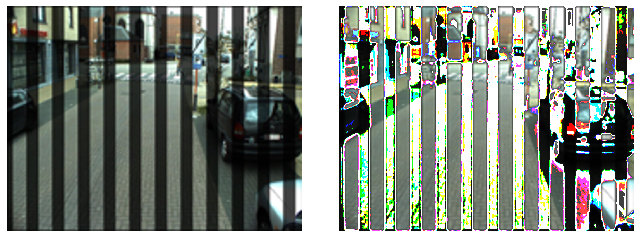

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
c_l= 10
c_g  = 1
g= 0.8
# I_C3_stretched= stretch(I_C3,3, clr =True, figsize=(9,7))
# I_C3_stretched= stretch(I_C3,3, log=True, c=c_l, clr =True, figsize=(9,7))
# I_C3_stretched= stretch(I_C3,3, gamma=True, c=c_g, g=g, clr =True, figsize=(9,7))
I_C3_stretched = I_C3.copy()
l = 0.1
h = 0.25
I_C3_stretched[(I_C3 >= l) & (I_C3 <= h)] =  np.clip(np.log(1 + 20 *I_C3[(I_C3 >= l) & (I_C3 <= h)]), 0, 1)


plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
io.imshow(I_C3)
plt.axis('off')

plt.subplot(1,2,2)
io.imshow(I_C3_stretched)
plt.axis('off')
# It = color.rgb2lab(I_C3)

# It[:,:,0] = It[:,:,0] /100

# It[:,:,0] = np.clip(np.log(1+10*It[:,:,0]), 0, 1)

# It[:,:,0] = It[:,:,0] *100
# It = color.lab2rgb(It)
# io.imshow(It)
# plt.tight_layout()
plt.show()

### Histogram Equilization

#### Global Equilization

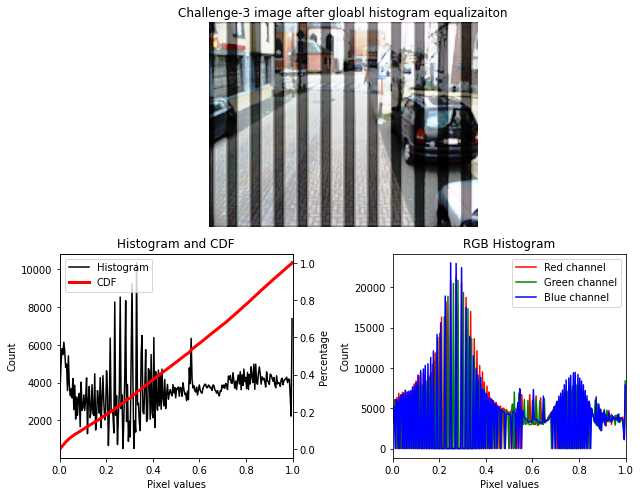

In [ ]:
I_C3_GE = GE(I_C3, 3, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### AHE

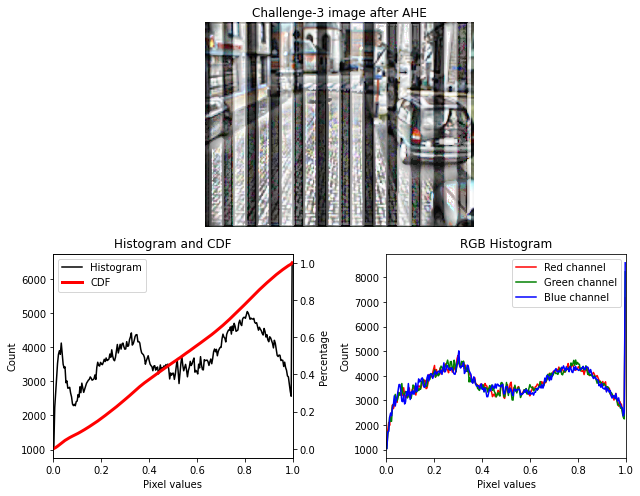

In [ ]:
I_C3_AHE = AHE_CLAHE(I_C3, 3, kernel_size = (70, 70), clip_limit=0, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### CLAHE

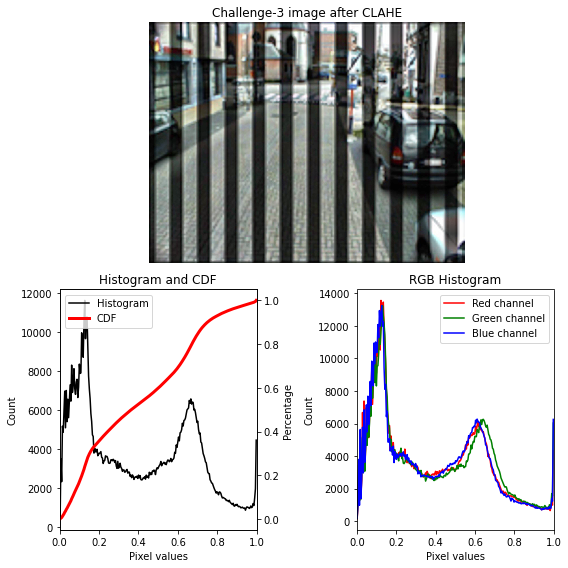

In [ ]:
I_C3_CLAHE = AHE_CLAHE(I_C3, 3, kernel_size = (70, 70), clip_limit=0.01, clr = True, figsize = (8,8), w_cdf = False)
plt.show()

### Final results

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


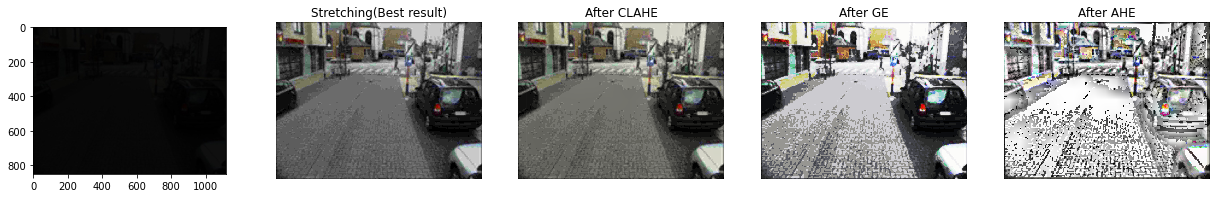

In [ ]:
I_C3_Sol = [I_C3, I_C3_stretched, I_C3_CLAHE,  I_C3_GE, I_C3_AHE ]
titles = ['Origianl image','Stretching(Best result)', 'After CLAHE',  'After GE', 'After AHE']
plt.rcParams['figure.figsize'] = (17,8)
plot_solutions(I_C3_Sol, titles)
# plt.tight_layout()
plt.axis('off')
plt.show()

## Challenge-4

In [ ]:
I_C4 = io.imread('challenge-4.jpg') / 255
print(I_C4.shape)
print("Min: ", str(I_C4.min()))
print("Max: ", str(I_C4.max()))

(850, 1121, 3)
Min:  0.0
Max:  1.0


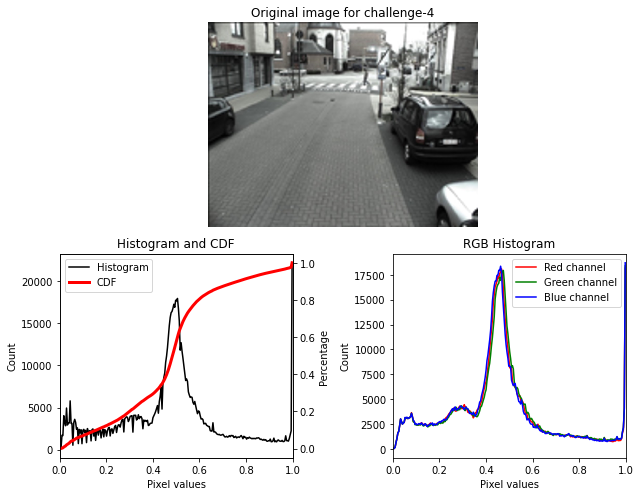

In [ ]:
  plt.rcParams['figure.figsize'] = (9,7)
  plot_img_hist(I_C4, ititle="Original image for challenge-4", plot_cdf=True, clr=True)
  plt.tight_layout()
  plt.show()

### Contrast Stretching


In [ ]:
I_C2_best = I_C2_CLAHE.copy()

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plot_hist_cdf_color(I_C2_best)
plt.subplot(2,2,2)
plot_hist_cdf_color(I_C4)

plt.subplot(2,2,3)
plot_hist_cdf_color(I_C2_best, plot_cdf=True)
plt.subplot(2,2,4)
plot_hist_cdf_color(I_C4, plot_cdf=True)

In [ ]:
print('red - green')
print((I_C2_best[:850,:1121,0] - I_C2_best[:850,:1121,1]).mean())
print('red-blue')
print((I_C2_best[:850,:1121,0] - I_C2_best[:850,:1121,2]).mean())
print('blue-green')
print((I_C2_best[:850,:1121,2] - I_C2_best[:850,:1121,1]).mean())



red - green
-0.014259597388037976
red-blue
0.006389849470015595
blue-green
-0.020649446858053554


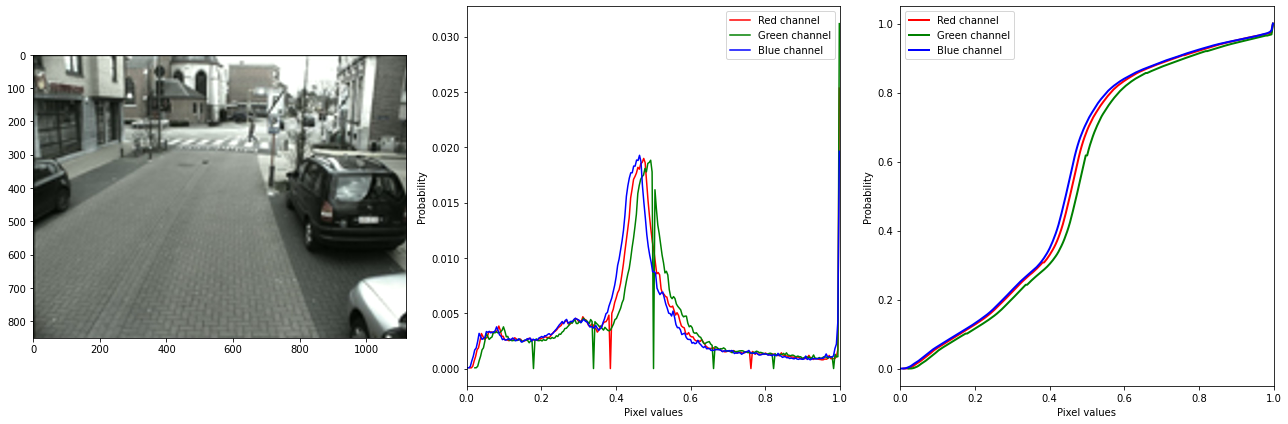

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
I_C4_inc = I_C4.copy()

I_C4_inc[:,:,0] = np.clip(I_C4_inc[:,:,0] + 0.0064, 0, 1)
I_C4_inc[:,:,1] = np.clip(I_C4_inc[:,:,1] + 0.020, 0, 1)
I_C4_inc[:,:,2] = np.clip(I_C4_inc[:,:,2] , 0, 1)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
io.imshow(I_C4_inc)


plt.subplot(1,3,2)
plot_hist_cdf_color(I_C4_inc)

plt.subplot(1,3,3)
plot_hist_cdf_color(I_C4_inc, plot_cdf=True)
plt.tight_layout()
plt.show()


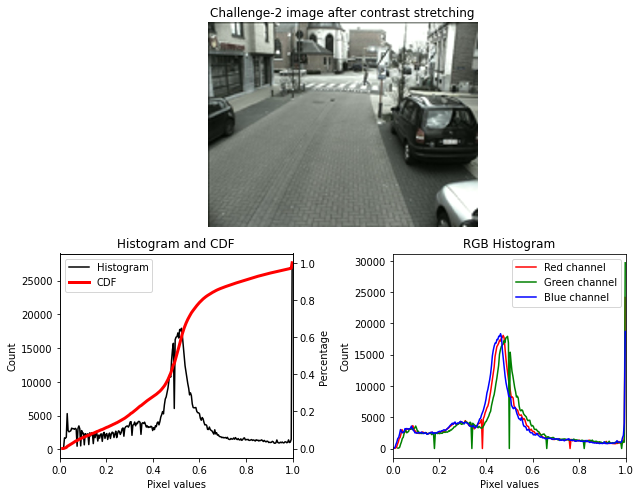

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
c_l = 1
c_g = 1
g = .8
I_min_max = (0.4, 0.6)
O_min_max = (0.3,0.7)

I_C4_stretched= stretch(I_C4_inc,2,clr =True, figsize=(9,7))
# I_C4_stretched= stretch(I_C4,2, I_min_max=I_min_max, O_min_max = O_min_max,  clr =True, figsize=(9,7))
# I_C4_stretched= stretch(I_C4,2, log=True, c=c_l, clr =True, figsize=(9,7))
# I_C4_stretched= stretch(I_C4,2, gamma=True, c=c_g, g = g, clr =True, figsize=(9,7))

plt.tight_layout()
# io.imshow(np.clip(I_C4*.5, 0 ,1))
plt.show()

### Histogram Equilization

#### Global Equilization

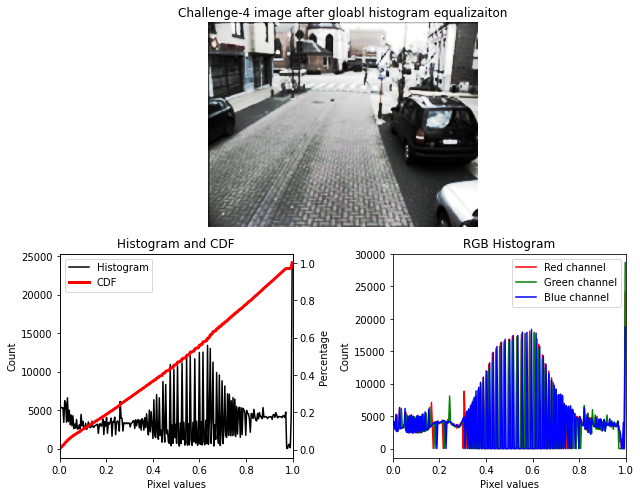

In [ ]:
I_C4_GE = GE(I_C4_inc, 4, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### AHE

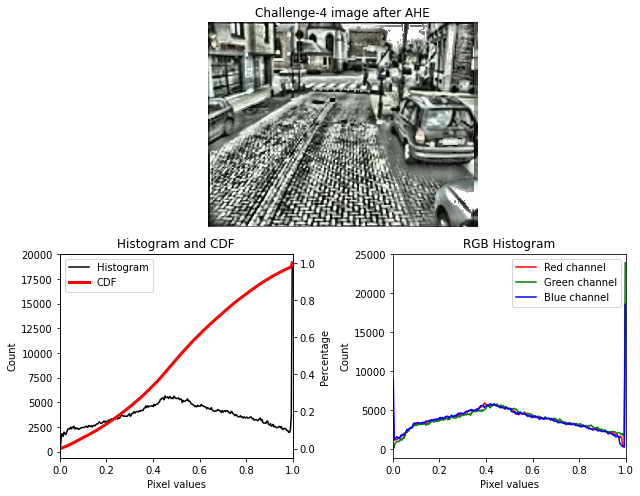

In [ ]:
I_C4_AHE = AHE_CLAHE(I_C4_inc, 4, kernel_size = (70, 70), to_lab=True, clip_limit=0, clr = True, figsize = (9,7), w_cdf = False)
plt.show()

#### CLAHE

In [ ]:
I_C4_CLAHE = AHE_CLAHE(I_C4_inc, 4, kernel_size = (80, 80), clip_limit=0.01, clr = True, figsize = (8,8), w_cdf = False)
plt.show()

### Final results

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


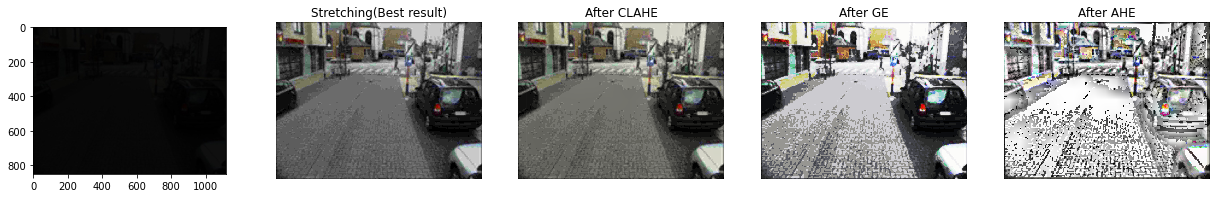

In [ ]:
I_C4_Sol = [I_C4, I_C4_stretched, I_C4_CLAHE,  I_C4_GE, I_C4_AHE ]
titles = ['Origianl image','Stretching(Best result)', 'After CLAHE',  'After GE', 'After AHE']
plt.rcParams['figure.figsize'] = (17,8)
plot_solutions(I_C4_Sol, titles)
# plt.tight_layout()
plt.axis('off')
plt.show()